In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [156]:
df = pd.read_csv('creditcard.csv')

In [157]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [158]:
# df.isna().sum()

In [159]:
anomaly = df['Class'].value_counts()

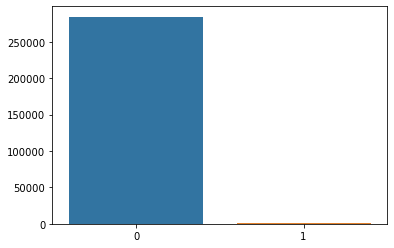

In [160]:
sns.barplot(df, x=anomaly.index, y=anomaly.values);

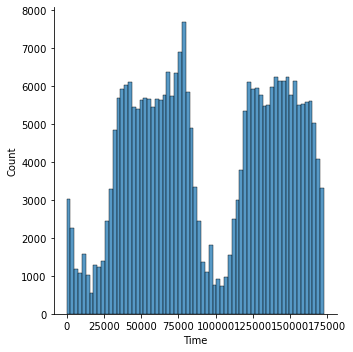

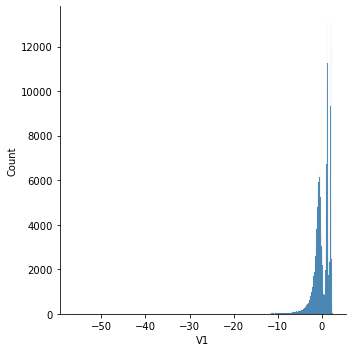

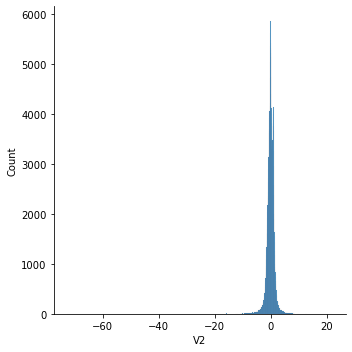

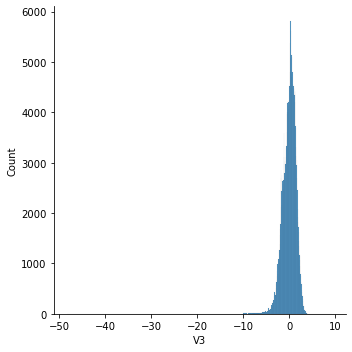

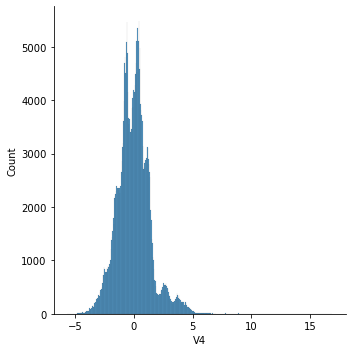

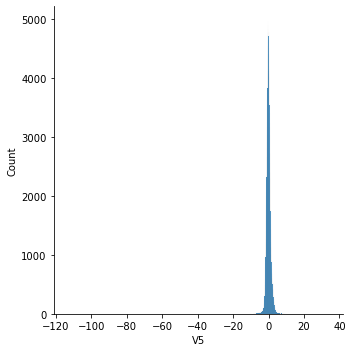

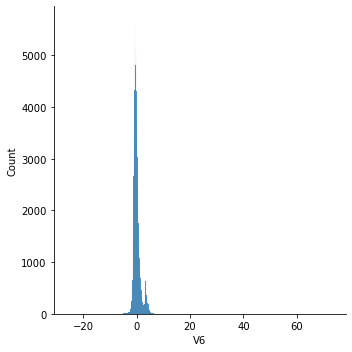

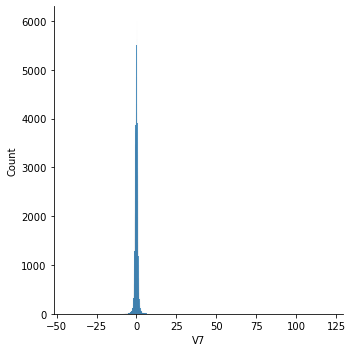

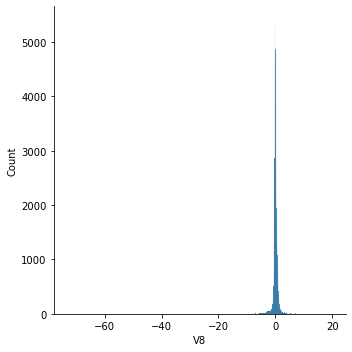

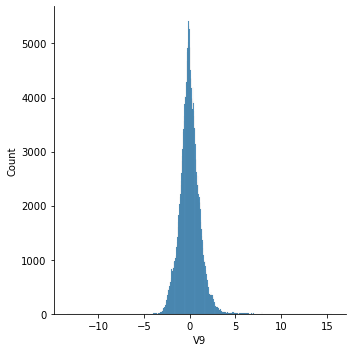

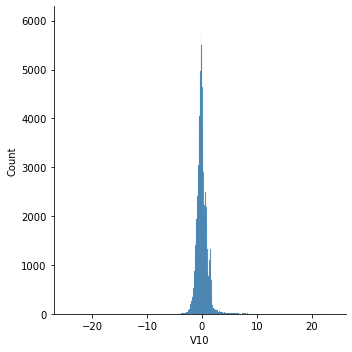

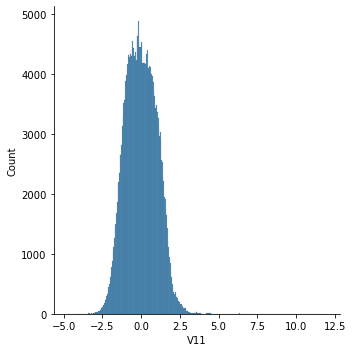

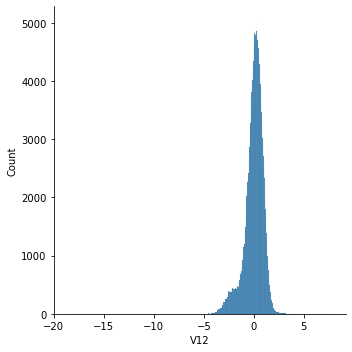

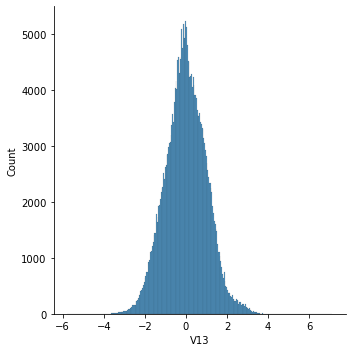

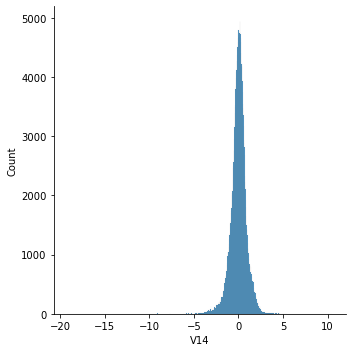

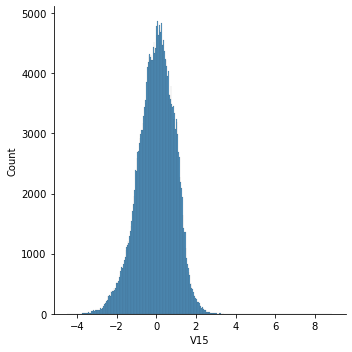

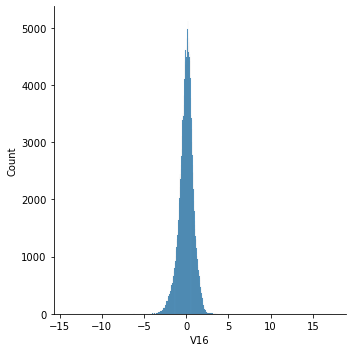

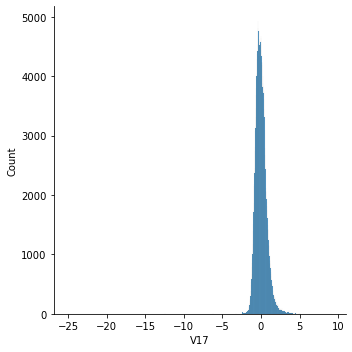

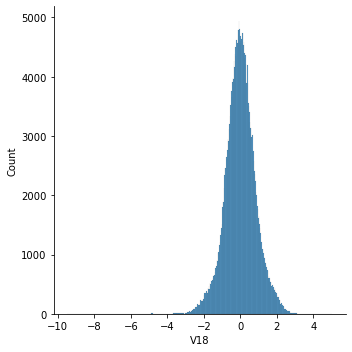

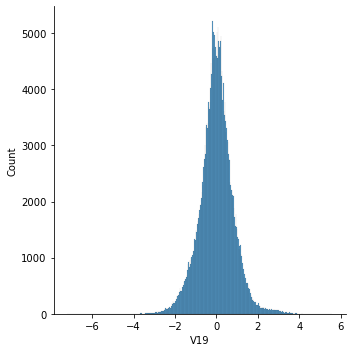

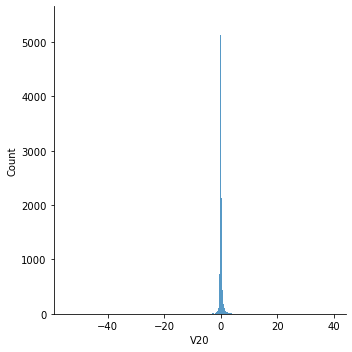

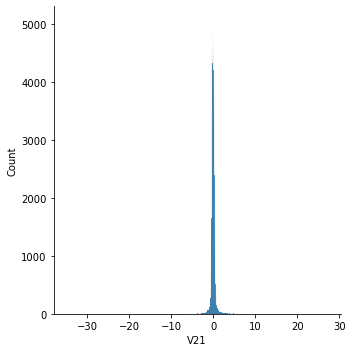

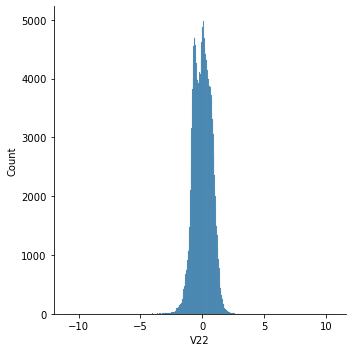

KeyboardInterrupt: 

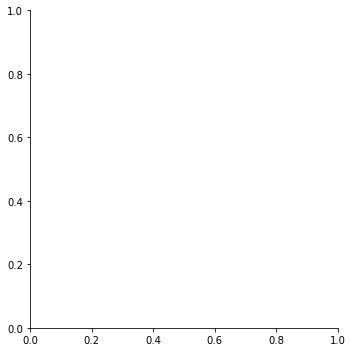

In [78]:
# for col in df:
#     sns.displot(df, x=col, kind='hist')
#     plt.show()

In [161]:
X = df.drop(columns=['Class', 'Time'], axis=1).values
y = df['Class'].values

In [140]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [162]:
X.shape

(284807, 29)

In [163]:
fraud_df = df[df['Class'] == 1].sample(20)
inlier_df = df[df['Class'] == 0].sample(1000)

In [168]:
concat_df = pd.concat([fraud_df, inlier_df], axis=0)

In [169]:
concat_df.shape

(1020, 31)

In [170]:
X_concat_df = df.drop(columns=['Class'], axis=1)
y_concat_df = df['Class']

In [ ]:
tsne = TSNE()
X_2d = tsne.fit_transform(X_concat_df)

In [ ]:
X_2d.shape

In [ ]:
reduced_df = pd.DataFrame(X_2d)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:
clf = IsolationForest(n_estimators=100)
clf.fit(X_train)
y_pred = clf.predict(X_test)

In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
np.unique(y_test)

In [ ]:
np.unique(y_pred)

In [132]:
(df['Class'] == 1).sum() / df.shape[0]

0.001727485630620034

In [ ]:
y_pred.shape

In [47]:
# df['anomaly'] = y_pred

# Anomaly Detection _ Unsupervised

In [92]:
X = df.drop(columns='Class', axis=1)
y = df['Class']

In [93]:
clf = IsolationForest(n_estimators=100)
y_pred = clf.fit_predict(X)

In [94]:
y_pred.shape

(284807,)

In [95]:
df['anomaly'] = y_pred

In [96]:
df['anomaly'].unique()

array([ 1, -1])

In [97]:
df['anomaly'].value_counts()

 1    273113
-1     11694
Name: anomaly, dtype: int64

In [98]:
### inliers

In [101]:
inliers_df = df[df['anomaly'] == 1]

In [117]:
from sklearn.linear_model import LinearRegression

In [122]:
def evaluate_outlier_classifier(model, data):
    # Get labels
    labels = model.fit_predict(data)

    # Return inliers
    return data[labels == 1]

def evaluate_regressor(inliers):
    X = inliers.drop("Amount", axis=1)
    y = inliers[['Amount']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.25)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    preds = lr.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)

    return round(rmse, 3)

In [123]:
inliers = evaluate_outlier_classifier(clf, X)

In [124]:
evaluate_regressor(inliers)

25.327

# Hyperparameter Tuning

In [126]:
contaminations = [0.07, 0.1, 0.15, 0.25]
scores = dict()

for c in contaminations:
    # Instantiate IForest with the current c
    iforest = IsolationForest(contamination=c, random_state=10)
    
    # Get inliers with the current IForest
    inliers = evaluate_outlier_classifier(iforest, df)
    
    # Calculate and store RMSE into scores
    scores[c] = evaluate_regressor(inliers)
print(scores)

{0.07: 19.46, 0.1: 17.224, 0.15: 14.624, 0.25: 11.601}


In [ ]:
n_estimators = [100, 200, 300]
max_samples = [0.6, 0.8, 1]
scores = dict()